In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from scipy import ndimage as ndi
from skimage import io, measure
import pandas as pd
import glob
import natsort
import tifffile

In [2]:
image_location = r"Y:\experiments\Experiments_005100\005176\Images_second_attempt\TIFs_registered_plus_auxin_5h_11h_release\5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09.czi #1.tif_registered.tif"

In [3]:
data = io.imread(image_location)
print("shape: {}".format(data.shape))
print("dtype: {}".format(data.dtype))
print("range: ({}, {})".format(data.min(), data.max()))

shape: (81, 2, 634, 634)
dtype: uint16
range: (0, 14838)


In [4]:
data_hoechst = data[:,1,:,:]
#Channel 4 – DNA(Hoechst) (magenta)
data_scc1 = data[:,0,:,:]

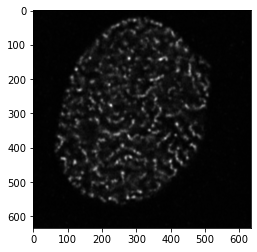

In [5]:
plt.imshow(data_scc1[27,:,:],cmap="gray")

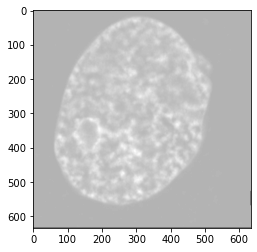

In [36]:
plt.imshow(data_hoechst[27,:,:],cmap="gray")

In [32]:
data_scc1[27,:,:]

array([[10005, 10005, 10003, ..., 10012, 10016, 10018],
       [10003, 10003, 10002, ..., 10015, 10018, 10019],
       [10002, 10001, 10001, ..., 10018, 10019, 10023],
       ...,
       [10009, 10021, 10035, ..., 10008, 10013, 10017],
       [10013, 10023, 10033, ..., 10008, 10010, 10014],
       [10016, 10022, 10027, ..., 10007, 10007, 10010]], dtype=uint16)

In [27]:
data_edu[27,:,:]

array([[10000, 10002, 10005, ..., 10030, 10022, 10017],
       [10002, 10003, 10005, ..., 10033, 10028, 10023],
       [10005, 10004, 10006, ..., 10029, 10028, 10026],
       ...,
       [10041, 10057, 10063, ..., 10013, 10007, 10008],
       [10042, 10054, 10060, ..., 10018, 10012, 10012],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=uint16)

# Homework 1
Explain: Why do we could we have a row with zeros at the bottom?

We need to fix the scaling of the color range:

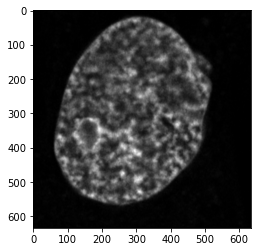

In [25]:
plt.imshow(data_hoechst[27,:,:],cmap="gray", vmin=10000)

# Reading ROIs from FIJI

In [4]:
from read_roi import read_roi_zip

In [5]:
# Attention this is a folder named like the tif not a tif!
roi_location = "/groups/gerlich/experiments/Experiments_005100/005176/Images_second_attempt/TIFs_registered_plus_auxin_5h_11h_release_background_subtracted/Ctrl/Scc1_EdU_Hoechst_5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09.czi #1.tif_registered.tif/"

In [6]:
roi = read_roi_zip(roi_location + "positions.zip")

In [ ]:
roi

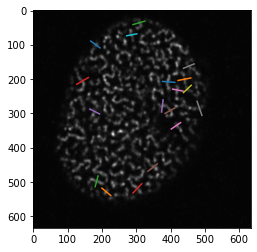

In [13]:
plt.figure()
#next line resets color cycle)
plt.gca().set_prop_cycle(None)
plt.imshow(data_scc1[22,:,:],cmap="gray")
for key, item in roi.items():
    x_values = [item["x1"],item["x2"]]
    y_values = [item["y1"],item["y2"]]
    plt.plot(x_values, y_values)

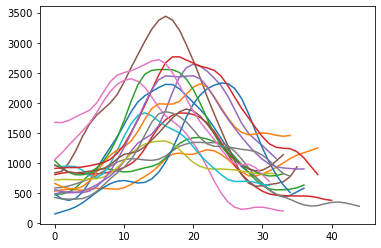

In [14]:
plt.figure()
plt.gca().set_prop_cycle(None)
for key, item in roi.items():
    # pay attention to the coordinate definition in scipy
    src = (item["y1"],item["x1"])
    dst = (item["y2"],item["x2"])
    y = measure.profile_line(data_hoechst[22,:,:], src, dst,1, mode="constant")-10000
    x = range(len(y))
    plt.plot(range(len(y)),y)

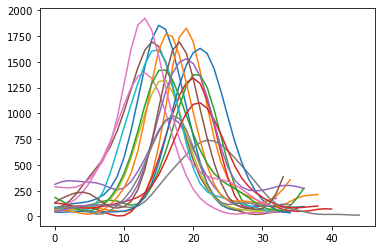

In [15]:
plt.figure()
plt.gca().set_prop_cycle(None)
for key, item in roi.items():
    # pay attention to the coordinate definition in scipy
    src = (item["y1"],item["x1"])
    dst = (item["y2"],item["x2"])
    y = measure.profile_line(data_scc1[22,:,:], src, dst,5, mode="constant")-10000
    x = range(len(y))
    plt.plot(range(len(y)),y)

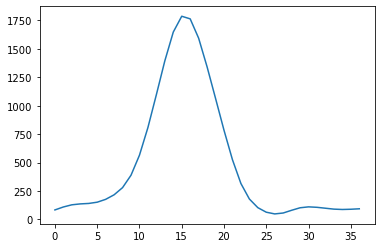

In [60]:
plt.figure()
plt.gca().set_prop_cycle(None)
for key, item in roi.items():
    # pay attention to the coordinate definition in scipy
    src = (item["y1"],item["x1"])
    dst = (item["y2"],item["x2"])
    y = measure.profile_line(data_scc1[22,:,:], src, dst,1, mode="constant")-10000
    x = range(len(y))
    plt.plot(range(len(y)),y)
    break

In [ ]:
import glob
file_list = natsort.natsorted(glob.glob("/home/clanger/Desktop/github/ia_playground/Scc1_EdU_Hoechst_5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09.czi #1.tif_registered.tif/*.csv"))
# glob is not sorted
# and sorted() is not a natural sort
file_list_unsorted = glob.glob("/home/clanger/Desktop/github/ia_playground/Scc1_EdU_Hoechst_5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09.czi #1.tif_registered.tif/*.csv")
#print(file_list_unsorted)
#print(sorted(file_list_unsorted))
#print(natsort.natsorted(file_list_unsorted))

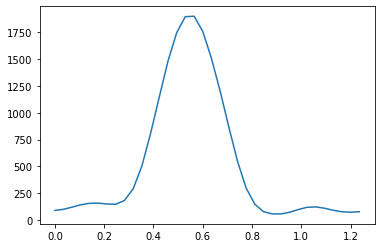

In [21]:
for csv in file_list:
    dataframe = pd.read_csv(csv)
    plt.plot(dataframe["Distance"],dataframe["Scc1"])
    break

In [22]:
dataframe

,,Label,Distance,Scc1,Hoechst
0,1,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.000,91.727,477.612
1,2,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.035,101.867,462.857
2,3,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.071,122.850,466.033
3,4,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.106,144.309,484.871
4,5,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.141,157.643,533.657
5,6,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.176,159.499,621.140
6,7,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.212,151.000,741.750
7,8,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.247,148.642,878.970
8,9,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.282,183.517,1036.794
9,10,5176_Ctrl_plus_auxin_zoom5.8_6h_G1_cells-04-09...,0.318,294.420,1246.657


# Reading Meta Data

In [72]:
# Attention: skimage.external.tifffile.TiffFile was removed for skimage 0.17 onwards
# meta_data was in tif.info()
# now need the "tifffile" library


In [23]:
with tifffile.TiffFile("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_G2_Fully_cyclinB1_20minrelease_H3S10_1-03-01.czi #1.tif_registered.tif") as tif:
    print(dir(tif))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_decoders', '_fh', '_files', '_lsm_fix_strip_bytecounts', '_lsm_fix_strip_offsets', '_lsm_load_pages', '_master', '_multifile', '_philips_load_pages', '_series_fluoview', '_series_generic', '_series_imagej', '_series_lsm', '_series_mdgel', '_series_ndpi', '_series_ome', '_series_qpi', '_series_scanimage', '_series_scn', '_series_shaped', '_series_sis', '_series_stk', '_series_svs', '_series_uniform', 'andor_metadata', 'asarray', 'aszarr', 'byteorder', 'close', 'eer_metadata', 'epics_metadata', 'fei_metadata', 'filehandle', 'filename', 'flags', 'fluoview_metadata', 'fstat', 'geotiff_metadata', 'imagej_metada

In [ ]:
with tifffile.TiffFile("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_G2_Fully_cyclinB1_20minrelease_H3S10_1-03-01.czi #1.tif_registered.tif") as tif:
    print(tif.imagej_metadata)

In [26]:
XResolution = 28.36199

# Homework2
- Why is it good to use "with" together with the TiffFile reader?
- Explain what the "with" does.
- Extract XResolution and YResolution from the meta_data field and assign to a varriable

## Fix axis to microns

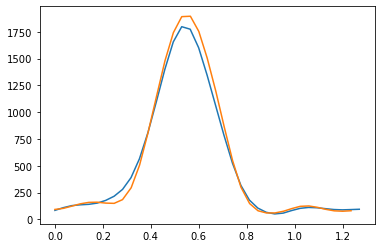

In [29]:
plt.figure()
plt.gca().set_prop_cycle(None)
for key, item in roi.items():
    # pay attention to the coordinate definition in scipy
    src = (item["y1"],item["x1"])
    dst = (item["y2"],item["x2"])
    y = measure.profile_line(data_scc1[22,:,:], src, dst,1, mode="constant")-10000
    x = [item / XResolution  for item in range(len(y))] 
    plt.plot(x,y)
    break
for csv in file_list:
    dataframe = pd.read_csv(csv)
    plt.plot(dataframe["Distance"],dataframe["Scc1"])
    break

# Homework 3:
a)
Build a function that generates a figure with four subplots:
- (1,2) ROIs on both image channels
- (2,3) Linescans on both channels
- Read the scaling for the axis (in microns) directly from the meta_data of the file.
- Allingne the line scans at their maxima
- Display the slice according to the slice information in the ROIs

b)
- Add noise as in the last homework.
- Show how it affects line scans and play with line scans width

c)
- Filter Top 10% line scans
- Filter Bottom 10% line scans
- Use the function in a) to display only those





